# Investigating Fandango Movie Ratings


We've come a long way in this course and managed to learn a good deal about sampling, variables, scales of measurement, and frequency distributions. To make learning smoother and more efficient, we learned about each of these topics in isolation. In this guided project, we make one step further and learn to combine all these skills to perform practical data analysis.

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.
![title](img/image.png)
Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)


The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


### Instructions 1

1. To help readers gain context into your project, use the first Markdown cell of the notebook to:
    - Add a title
    - Write a short introduction where you explain readers in no more than two paragraphs:
        * What the project is about
        * What your goal is in this project
        
2. The title and the introduction are tentative at this point, so don't spend too much time here — you can come back at the end of your work to refine them.


--------------------------------------------------
Walt Hickey made the data he analyzed publicly available. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

### Instructions 2

1. Read in and explore briefly the two data sets (fandango_score_comparison.csv and movie_ratings_16_17.csv) to understand their structure. You can find the documentation of both data sets in data/ directory.

2. Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

    - For the data set with ratings previous to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'
    - For the other data set, select the the following columns: 'movie', 'year', 'fandango'
 
3. Define the population of interest for our goal — remember that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis

4. By reading the attached files, figure out whether the two samples are representative for the population we're trying to describe.
    
    - Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
    - Useful information can also be found in [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/)


In [1]:
import pandas as pd
import numpy as np

In [10]:
df0 = pd.read_csv('data/fandango_score_comparison.csv')
df1 = pd.read_csv('data/movie_ratings_16_17.csv')
df0.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
df1.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
df0[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [11]:
fandango_before = df0[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [12]:
fandango_after = df1[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Instructions 3

1. Change slightly the current goal of our analysis such that:

    - The population of interest changes and the samples we currently work with become representative.
    -The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis
    
2. This is not a one-solution-only exercise, so don't be afraid to experiment with new ideas

In [7]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
#choosing movies released in 2016 from fandango_after as instructed
fandango_after_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_after_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [14]:
#selecting movies from 2015 too
fandango_before['year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [19]:
fandango_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [22]:
fandango_before_2015 = fandango_before[fandango_before['year']=='2015'].copy()
fandango_before_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [23]:
fandango_before_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [24]:
fandango_before_2015['year'].dtype

dtype('O')

we changed our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. For learning purposes, you should follow along and try to understand our approach.
With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

### Instructions 4

1. Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website

2. One of the data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.
    - Find a quick way to check whether this sample contains enough popular movies as to be representative

3. If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

    - Isolate the movies released in 2015 in a separate data set.
    - Isolate the movies released in 2016 in another separate data set.
    - These are the data sets we'll use next to perform our analysis

In [16]:
sum(fandango_before['Fandango_votes']<30)

0

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

### Instructions 5

1. Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. Customize the graph such that:
    - It has a title with an increased font size.
    - It has labels for both the x and y-axis.
    - It has a legend which explains which distribution is for 2015 and which is for 2016.
    - The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.
    - The tick labels of the x-axis are: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0].
    - It has the fivethirtyeight style (this is optional). You can change to this style by using plt.style.use('fivethirtyeight'). This line of code must be placed before the code that generates the kernel density plots.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

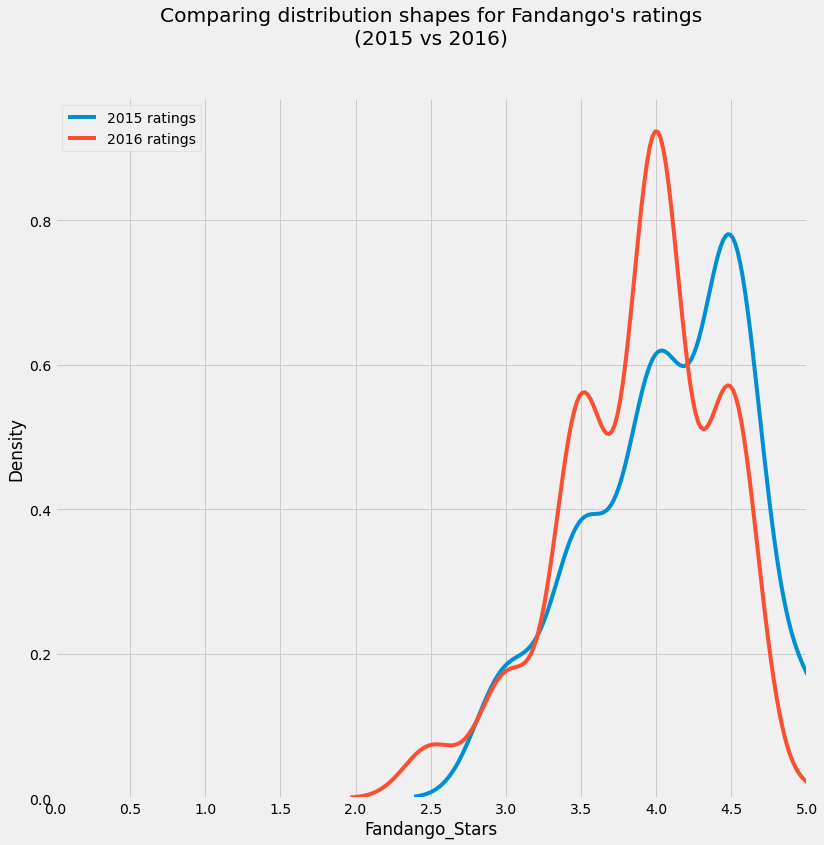

In [38]:
plt.figure(figsize=[12,12])
plt.style.use('fivethirtyeight')
sns.kdeplot(fandango_before_2015['Fandango_Stars'],label='2015 ratings')
sns.kdeplot(fandango_after_2016['fandango'],label='2016 ratings')
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xticks(ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],label=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)
plt.legend();

2. Analyze the two kernel density plots. Try to answer the following questions:

    - What is the shape of each distribution?
    - How do their shapes compare?
    - If their shapes are similar, is there anything that clearly differentiates them?
    - Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?
    - Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?


### Plot analysis

Both distributions are strongly left skewed.<br/>
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.<br/>
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings.<br/>
There was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016, due to the shift in the 2016 kde plot.

The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

### Instructions 6

1. Examine the frequency distribution tables of the two distributions.

    - The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
    - If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?


In [43]:
print('2015' + '\n' + '-' * 16) 
fandango_before_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [44]:
print('2016' + '\n' + '-' * 16)
fandango_after_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

2. Analyze the two tables and try to answer the following questions:

    - Is it still clear that there is a difference between the two distributions?
    - What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

We've already learned a bit about these three summary metrics in the pandas course, and we'll learn more about them right in the next lesson of the next course. For now, here are the pandas methods you can use to compute these summary metrics:

- [Series.mean()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- [Series.median()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- [Series.mode()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### Instructions 7

1. Compute the mean, median, and mode for each distribution.
2. Compare these metrics and determine what they tell about the direction of the difference.
3. What's magnitude of the difference? Is there a big difference or just a slight difference?
4. Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016. You should arrive at a graph that looks similar (not necessarily identical) to this:

![title](img/image2.png)


In [39]:
mean_2015 = fandango_before_2015['Fandango_Stars'].mean()
mean_2016 = fandango_after_2016['fandango'].mean()

median_2015 = fandango_before_2015['Fandango_Stars'].median()
median_2016 = fandango_after_2016['fandango'].median()

mode_2015 = fandango_before_2015['Fandango_Stars'].mode()[0] 
mode_2016 = fandango_after_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


In [41]:
from numpy import arange

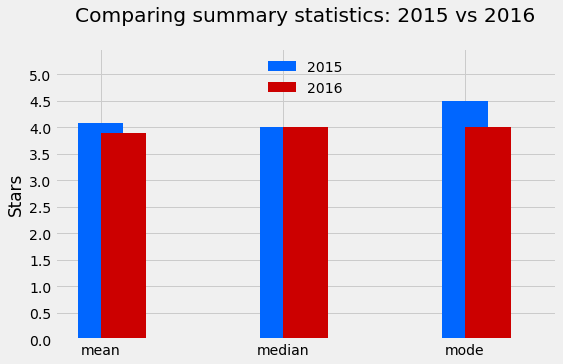

In [42]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center');


### Instructions 8

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Try to wrap up your work by writing a conclusion that's no more than two paragraphs. In one of the paragraphs, try to answer what caused the change revealed by our analysis.

These are a few next steps to consider:

- Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look at [this tutorial](https://www.dataquest.io/blog/making-538-plots/) if you want to do that.
- Improve your project from a stylistical point of view by following the guidelines discussed in this [style guide](https://www.dataquest.io/blog/data-science-project-style-guide)
- Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here — you can take some inspiration from [this article](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19)
- Collect recent movie ratings data and formulate your own research questions. You can take a look at [this blog](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) post to learn how to scrape movie ratings for IMDB and Metacritic.

**Do not forget please to submit your notebook on Google Classroom**

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.